In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

In [2]:
X = np.linspace(start=0, stop=10, num=100).reshape(-1, 1)
y = np.squeeze(X * np.sin(X))

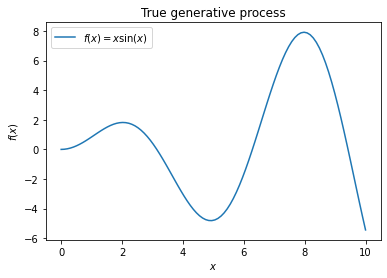

In [3]:
plt.plot(X, y, label=r"$f(x) = x \sin(x)$")
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
_ = plt.title("True generative process")

In [4]:
rng = np.random.RandomState(9)
training_indices = rng.choice(np.arange(y.size), size=6, replace=False)
X_train, y_train = X[training_indices], y[training_indices]

In [5]:
kernel = 1 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))
gaussian_process = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
gaussian_process.fit(X_train, y_train)
gaussian_process.kernel_

5.22**2 * RBF(length_scale=1.86)

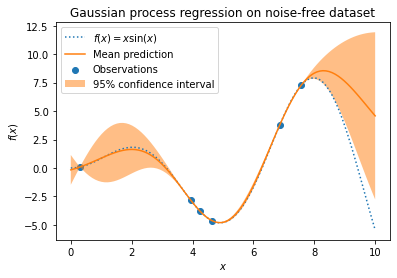

In [6]:
mean_prediction, std_prediction = gaussian_process.predict(X, return_std=True)

plt.plot(X, y, label=r"$f(x) = x \sin(x)$", linestyle="dotted")
plt.scatter(X_train, y_train, label="Observations")
plt.plot(X, mean_prediction, label="Mean prediction")
plt.fill_between(
    X.ravel(),
    mean_prediction - 2 * std_prediction,
    mean_prediction + 2 * std_prediction,
    alpha=0.5,
    label=r"95% confidence interval",
)
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
_ = plt.title("Gaussian process regression on noise-free dataset")

In [7]:
pred_df = pd.DataFrame()
pred_df["x"] = X.ravel()
pred_df["mean_pred"] = mean_prediction
pred_df["std_pred"] = std_prediction
pred_df["true_gen"] = y

In [8]:
pred_df

,x,mean_pred,std_pred,true_gen
0,0.00000,-0.165922,0.654666,0.000000
1,0.10101,-0.087934,0.427538,0.010186
2,0.20202,-0.002360,0.208698,0.040535
3,0.30303,0.090428,0.000010,0.090428
4,0.40404,0.189911,0.196790,0.158843
...,...,...,...,...
95,9.59596,5.873612,2.949080,-1.634641
96,9.69697,5.548730,3.140501,-2.606964
97,9.79798,5.222975,3.325463,-3.572331
98,9.89899,4.898933,3.502875,-4.520250


In [9]:
observation_df = pd.DataFrame()
observation_df["x"] = X_train.ravel()
observation_df["y"] = y_train

In [10]:
observation_df

,x,y
0,7.575758,7.284430
1,4.242424,-3.782479
2,4.646465,-4.636371
3,6.868687,3.795756
4,0.303030,0.090428
5,3.939394,-2.819907


In [11]:
pred_df.to_csv("../data/gp_prediction.csv", index=False)
observation_df.to_csv("../data/gp_observations.csv", index=False)